In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras

In [2]:
df = pd.read_csv('two_dataset.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
def prob(num):
    model_path = 'two.keras'
    x = df['X'].values.reshape(-1,1)
    y = df['Y'].values.reshape(-1,1)
    xn = x.min()
    yn = y.min()
    xx = x.max()
    yx = y.max()
    x = (x-xn)/(xx-xn)
    y = (y-yn)/(yx-yn)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(1,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = 'adam', loss='mean_squared_error')
        hist = model.fit(x,y, epochs=500)
        model.save('two.keras')
        lv = hist.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(x, y, label='actual', color='blue')
        plt.plot(x,pred, label='predicted', color='pink')
        plt.grid(True)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
    return model.predict(np.array([[(num-xn)/(xx-xn)]]))[0][0]*(yx-yn)+yn


Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1027 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1017
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0748
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0752
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0810
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0760
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0782
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0599
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0594
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0656
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0482
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0441
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0454
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0445
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0452
Epoch 16/500
2/2 ━━━━━━━━━━━━━

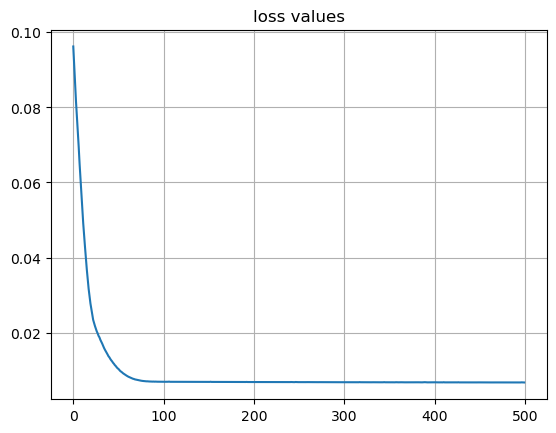

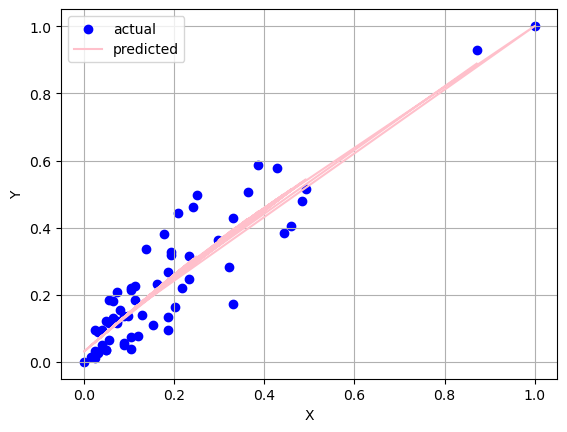

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
350.48684211969373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
195.4759323000908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
152.8991191327572


In [4]:
print(prob(100))
print(prob(50))
print(prob(37))